<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#Présentation-des-tâches" data-toc-modified-id="Présentation-des-tâches-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Présentation des tâches</a></span><ul class="toc-item"><li><span><a href="#Quelques-ressources" data-toc-modified-id="Quelques-ressources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quelques ressources</a></span><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Pandas</a></span></li><li><span><a href="#expressions-régulières:" data-toc-modified-id="expressions-régulières:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>expressions régulières:</a></span></li></ul></li></ul></li><li><span><a href="#Tâches" data-toc-modified-id="Tâches-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tâches</a></span><ul class="toc-item"><li><span><a href="#Tâche-1" data-toc-modified-id="Tâche-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tâche 1</a></span></li><li><span><a href="#Tâche-2" data-toc-modified-id="Tâche-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tâche 2</a></span></li><li><span><a href="#Tâche-3" data-toc-modified-id="Tâche-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tâche 3</a></span></li><li><span><a href="#Tâche-4" data-toc-modified-id="Tâche-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tâche 4</a></span></li><li><span><a href="#Tâche-5" data-toc-modified-id="Tâche-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Tâche 5</a></span></li></ul></li></ul></div>

Le but de ce tutoriel est de vous familiariser avec `pandas` et les expressions régulières qui vous seront utiles pour vos projets.

Ce tutoriel, contrairement au précédent ne vous donne pas les solutions et vous laisse essayer de résoudre diverses tâches. Le contenu qui vous sera utile pour apprendre `pandas` et les expressions régulières est externe à ce tutoriel et est référencé plus bas.

Je vous invite à chercher de vous même d'autres ressources, car celle qui sont présentes dans ce tutoriel ne sont pas exhaustives. De plus, vous pouvez me contactez par mail au besoin et nous planifierons une réunion.

Les tâches qui vous sont proposées devraient vous aider à vous familiarisez avec les données et sur la manière de les manipuler. La tâche 1 vous permettra de comprendre les bases de pandas. La tâche 2 de comprendre les expressions régulières. Les tâches 3 et 4 de passer de phrases aux mots (qui peut être utiler pour nettoyer des données). Et finalement la tâche 5 vous permettra de détecter des doublons d'entrées.

Nous commençons par quelques `import` et définition de fonction utile, il n'est pas nécessaire de tout comprendre dans la cellule suivante.

Pour ceux qui n'ont pas installé `Anaconda`, avant de pouvoir utiliser ce tutoriel, il vous faut installer `pandas` avec la commande `pip install pandas`.

In [405]:
import pandas as pd

from IPython.display import display
from urllib.parse import quote

doc2start = {"bpt6k63243601": 123, "bpt6k62931221": 151, "bpt6k6286466w": 189, "bpt6k6393838j": 219, "bpt6k6331310g": 216, "bpt6k6292987t": 353, "bpt6k62906378": 288, "bpt6k6391515w": 319, "bpt6k6315927h": 349, "bpt6k6319106t": 324, "bpt6k6315985z": 82, "bpt6k63959929": 82, "bpt6k63197984": 56, "bpt6k6389871r": 77, "bpt6k6319811j": 79, "bpt6k6282019m": 72, "bpt6k6314752k": 190, "bpt6k6305463c": 113, "bpt6k6318531z": 108, "bpt6k6324389h": 72, "bpt6k63243920": 80, "bpt6k6309075f": 96, "bpt6k6333200c": 132, "bpt6k63243905": 134, "bpt6k6333170p": 137, "bpt6k96727875": 135, "bpt6k9764746t": 99, "bpt6k97645375": 123, "bpt6k9672117f": 125, "bpt6k9763554c": 123, "bpt6k9763553z": 105, "bpt6k9677392n": 110, "bpt6k9692809v": 113, "bpt6k9762929c": 129, "bpt6k9672776c": 119, "bpt6k9764647w": 121, "bpt6k9669143t": 145, "bpt6k9677737t": 139, "bpt6k9668037f": 167, "bpt6k96839542": 171, "bpt6k96762564": 185, "bpt6k9685861g": 189, "bpt6k9763471j": 153, "bpt6k9762899p": 157, "bpt6k97630871": 11, "bpt6k9684454n": 235, "bpt6k9732740w": 239, "bpt6k9684013b": 189, "bpt6k9692626p": 305, "bpt6k9685098r": 281, "bpt6k9764402m": 329, "bpt6k97631451": 322, "bpt6k9776121t": 49, "bpt6k9775724t": 33, "bpt6k97774838": 327, "bpt6k9780089g": 339}

def entry2url(row):
    """
    Takes a row of an Annuaire csv and
    transforms it to the corresponding Gallica url
    """
    url = "https://gallica.bnf.fr/ark:/12148/"
    
    directory = row['directory']
    page = row['page'] - doc2start[directory]
    url += f"{row['directory']}/f{row['page']-doc2start[row['directory']]}"
    
    r_strings = []
    if 'name' in row:
        r_strings.append(quote(row['name'].replace('.', ' ')))
    if 'job' in row:
        r_strings.append(quote(row['job'].replace('.', ' ')))
    if 'street' in row:
        r_strings.append(quote(row['street'].replace('.', ' ')))
    if 'number' in row:
        r_strings.append(quote(row['number'].replace('.', ' ')))
    
    if len(r_strings) > 0:
        url += f".item.r={'%20'.join(r_strings)}.zoom"
    
    return url

def add_clickable_url(bottin_dataframe):
    bottin_dataframe = bottin_dataframe.copy()
    bottin_dataframe['url'] = bottin_dataframe.apply(entry2url, axis=1)
    def make_clickable(val):
        return '<a href="{}">gallica url</a>'.format(val,val)

    return bottin_dataframe.style.format(make_clickable, subset=['url'])

# Chargement des données

`Pandas` est une librairie qui permet de traiter des données tabulaires.

Elle comporte deux types d'objets, les `Series` qui correspondent à des colonnes et des `Dataframe` qui correspondent à des colonnes mises en tableau.

`Pandas` permet de directement lire les fichier `csv` à l'aide de la fonction `pd.read_csv`.

In [234]:
data_bottin = pd.read_csv('./bottin_test_data.csv')

Nous pouvons maintenant observer les données à l'aide de la fonction `.head`.

In [456]:
data_bottin.head()

,directory,page,row,year,name,job,street,number,street_clean,street_only,number_clean
0,bpt6k97631451,644,2,1901,Aarault,vins et hôtel,r. St-Honoré,312.,rue Saint-Honoré,Saint-Honoré,312
1,bpt6k97631451,644,3,1901,Aaron,march. de chevaux,r. Bouret,39,rue Bouret,Bouret,39
2,bpt6k97631451,644,7,1901,Aaron,fantaisies pour modes,quai Jemmapes,56.,quai Jemmapes,Jemmapes,56
3,bpt6k97631451,644,9,1901,Aaron (Emile et Edouard),négociants,cour et pass. des Petites-Écuries,20.,courue et passage des Petites-Écuries,cous Petites-Écuries,20
4,bpt6k97631451,644,11,1901,Aaron frères,vente à crédit,r.d'Angoulême,52.,rued'Angoulême,d'Angoulême,52


Pour conclure cette introduction, nous allons maintenant sélectionner au hasard 10 entrées (à l'aide de `.sample`) et utiliser la fonction helper `add_clickable_url` qui permet de rajouter une colonne `url` à notre dataframe qui donne un lien vers la page du bottin.

In [237]:
sample = data_bottin.sample(10)
add_clickable_url(sample)

,directory,page,row,year,name,job,street,number,street_clean,street_only,url
614646,bpt6k9780089g,1589,132,1922,Vincent (Mme Jeanne),couronnes funéraires,av. Niel,14.,avenue Niel,Niel,gallica url
491711,bpt6k9780089g,718,178,1922,Bailly,ébéniste,r. de Boulainvillers,3.,rue de Boulainvillers,Boulainvillers,gallica url
242340,bpt6k9775724t,854,248,1914,Veylie (V.),boucher en gros,r. de Flandre,129.,rue de Flandre,Flandre,gallica url
482637,bpt6k97774838,1516,26,1921,Veræguth (A.),électricité,r. de Sèvres,155.,rue de Sèvres,Sèvres,gallica url
377842,bpt6k97774838,728,29,1921,Berthoud (Mme),teinture,r. des Abbesses,57.,rue des Abbesses,s Abbesses,gallica url
466687,bpt6k97774838,1379,317,1921,(110).Richard (Mme),profess. de piano,r. Cuvier,16.,rue Cuvier,Cuvier,gallica url
292656,bpt6k9776121t,415,108,1907,Foulliaron (Dr J.),médecin,boul. Raspail,193.,boulevard Raspail,Raspail,gallica url
518128,bpt6k9780089g,904,27,1922,Cornet (Emile),tissus anglais,r. d'Aboukir,30.,rue d'Aboukir,d'Aboukir,gallica url
300379,bpt6k9776121t,465,194,1907,Gouyet,vins,r. Bichat,71.,rue Bichat,Bichat,gallica url
445908,bpt6k97774838,1224,202,1921,Marguerite,lingerie,r. Castiglione,9.,rue Castiglione,Castiglione,gallica url


# Présentation des tâches

Comme exemple, nous allons essayer d'extraire des information du champ `name`, il faudra réaliser les tâches suivantes:
1. Calculer quelques statistiques de base
2. Extraire les entrées avec un seul mot ou un seul mot et du contenu entre parenthèse dans `name` (ignorer les espaces avant et après).
3. Extraire le compte de chaque mot dans le texte entre parenthèse dans `name`.
4. Extraire le compte de chaque mot dans tout texte de `name` ne contenant pas un seul mot et des parenthèse.
5. Grouper les entrées par nom, métier, rue et numéro uniques et faire quelques statistiques de bases

## Quelques ressources

Comme expliqué plus haut, voici quelques ressources pour vous aider, je vous conseille de les lire attentivement et de faire quelques tests vous même dans un notebook.

Si vous n'arrivez pas à réaliser une des tâches, n'hésitez pas à googler votre problème, `pandas` est une librairie très populaire et il y a de grande chance que quelque'un ait déjà eu un problème similaire au vôtre.

### Pandas

- [Tutoriel officiel](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#selection)
- [Fonctions plus avancées](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#idioms) (vous aurez surtout besoin des parties "Idioms", "Selection" et "Grouping").
- [Guide pour travailler avec du texte](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

### expressions régulières:
- [Tutoriel écrit](https://github.com/ziishaned/learn-regex/blob/master/translations/README-fr.md)
- [Tutoriel interactif](https://regexone.com/)
- [Site pour tester ses regex](https://regex101.com/)

# Tâches

## Tâche 1

Le but de cette tâche est de calculer quelques statistiques de bases. Il faut trouver:

1. Le nombre d'entrées
2. Le nombre d'entrées par année (indice, utilisez `.groupby` et `.size`)
3. Le nombre de noms uniques (indice, utilisez `.unique`)
4. Le nombre de métiers uniques
5. Le nombre de rues uniques

Puis quelques graphe à réaliser (c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)):
1. Le graphe du nombre d'entrées par années
2. L'histogramme (c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)) du nombre de doublons de noms (en x vous aurez le nombre de doublons et en y la fréquence), indice, utilisez `.value_counts` et si vous ne voyez rien sur votre histogramme, les options `loglog` et `bins` de `.hist`.
3. Le même histogramme que précédemment, mais pour les métiers.

In [ ]:
entries_number = data_bottin # à compléter
entries_per_year = data_bottin # à compléter
unique_names_number = data_bottin # à compléter
unique_jobs_number = data_bottin # à compléter
unique_streets_number = data_bottin # à compléter

print(f"Il y {entries_number} entrées, dont {unique_names_number} noms uniques, {unique_jobs_number} métiers uniques, {unique_streets_number} rue uniques")
print("La distribution d'entrées par année est la suivante:")
print("\n".join([f"{year}: {count}" for year, count in entries_per_year.reset_index().values]))

Si vous avez réussi, vous devriez avoir le texte suivant:
<div class="output_subarea output_text output_stream output_stdout"><pre>Il y 6789596 entrées, dont 269593 noms uniques, 60784 métiers uniques, 39916 rue uniques

La distribution d'entrées par année est la suivante:
	1901: 122529
	1907: 121765
	1914: 123464
	1921: 118520
	1922: 130958
</pre></div>

Pour les graphes, il suffit de transformer votre dataframe dans le bon format (en utilisant `.groupby`, `.size` et `.value_counts`), puis d'utiliser `.plot` ou `.hist` avec les bonnes options.

In [ ]:
data_bottin # Plot des entrées par années

Votre graphe devrait ressembler à ça:
<div class="output_subarea output_png"><img src="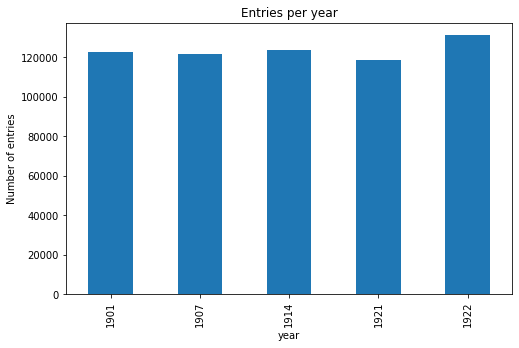
"></div>

In [ ]:
data_bottin # Histogramme des doublons de noms

Votre graphe devrait ressembler à ça (en utilisant `loglog=True` et `bins=1000`):
<img src="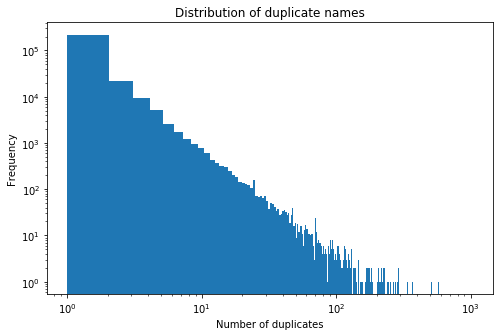
">

In [ ]:
data_bottin # Histogramme des doublons de métier

Votre graphe devrait ressembler à ça (en utilisant `loglog=True` et `bins=1000`):
<img src="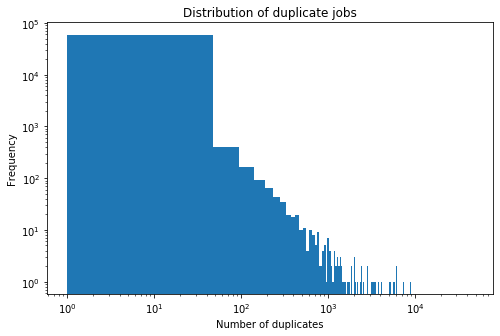
">

## Tâche 2

Le but de cette tâche est d'extraire les entrées avec un seul mot ou un seul mot et du contenu entre parenthèse dans `name` (ignorer les espaces avant et après).

Pour cette tâche, il vous suffira d'écrire une seul expression régulière, ce [lien](https://regex101.com/r/Ccyja3/1/tests) vous permettra de tester votre expression régulière.

Pour pouvoir extraire les lignes correspondantes, vous pouvez indexer les données avec le prédicat qui vous est retourné par `['name'].str.match`, c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html?highlight=str%20match#pandas.Series.str.match).

In [299]:
regex_one_word = '^$'

predicate_one_word = data_bottin['name'].notnull() # à remplacer, pour le moment sélélectionne tout

data_bottin_one_word = data_bottin.loc[predicate_one_word].copy()

Vous devriez obtenir le résultat suivant, avec 526943 lignes:
<div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>directory</th>
      <th>page</th>
      <th>row</th>
      <th>year</th>
      <th>name</th>
      <th>job</th>
      <th>street</th>
      <th>number</th>
      <th>street_clean</th>
      <th>street_only</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>2</td>
      <td>1901</td>
      <td>Aarault</td>
      <td>vins et hôtel</td>
      <td>r. St-Honoré</td>
      <td>312.</td>
      <td>rue Saint-Honoré</td>
      <td>Saint-Honoré</td>
    </tr>
    <tr>
      <th>1</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>3</td>
      <td>1901</td>
      <td>Aaron</td>
      <td>march. de chevaux</td>
      <td>r. Bouret</td>
      <td>39</td>
      <td>rue Bouret</td>
      <td>Bouret</td>
    </tr>
    <tr>
      <th>2</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>7</td>
      <td>1901</td>
      <td>Aaron</td>
      <td>fantaisies pour modes</td>
      <td>quai Jemmapes</td>
      <td>56.</td>
      <td>quai Jemmapes</td>
      <td>Jemmapes</td>
    </tr>
    <tr>
      <th>3</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>9</td>
      <td>1901</td>
      <td>Aaron (Emile et Edouard)</td>
      <td>négociants</td>
      <td>cour et pass. des Petites-Écuries</td>
      <td>20.</td>
      <td>courue et passage des Petites-Écuries</td>
      <td>cous Petites-Écuries</td>
    </tr>
    <tr>
      <th>5</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>12</td>
      <td>1901</td>
      <td>Abadie (Ch. Vallois succcess.)</td>
      <td>fabr. de billards</td>
      <td>r. du Grand-Prieuré</td>
      <td>8.</td>
      <td>rue du Grand-Prieuré</td>
      <td>Grand-Prieuré</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>617230</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>256</td>
      <td>1922</td>
      <td>Zwinger (E.)</td>
      <td>commiss. en march</td>
      <td>r. Saulnier</td>
      <td>7.</td>
      <td>rue Saulnier</td>
      <td>Saulnier</td>
    </tr>
    <tr>
      <th>617232</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>259</td>
      <td>1922</td>
      <td>Zygomalas</td>
      <td>perles fausses</td>
      <td>r. de Constantinople</td>
      <td>28.</td>
      <td>rue de Constantinople</td>
      <td>Constantinople</td>
    </tr>
    <tr>
      <th>617233</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>261</td>
      <td>1922</td>
      <td>Zysapel</td>
      <td>restaurant</td>
      <td>r. des Ecouffes</td>
      <td>14.</td>
      <td>rue des Ecouffes</td>
      <td>s Ecouffes</td>
    </tr>
    <tr>
      <th>617234</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>263</td>
      <td>1922</td>
      <td>Zyssmann</td>
      <td>bar</td>
      <td>r. de Pivoli</td>
      <td>40.</td>
      <td>rue de Pivoli</td>
      <td>Pivoli</td>
    </tr>
    <tr>
      <th>617235</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>267</td>
      <td>1922</td>
      <td>Zzaoui (Jacques)</td>
      <td>dentiste</td>
      <td>r. de l'Arrivée</td>
      <td>22.</td>
      <td>rue de l'Arrivée</td>
      <td>l'Arrivée</td>
    </tr>
  </tbody>
</table>
<p>526943 rows × 10 columns</p>
</div></div>

## Tâche 3

Le but de cette tâche est d'extraire le compte de chaque mot dans le texte entre parenthèse dans `name`.

La première étape est d'extraire de le texte entre parenthèse, il existe une fonction dans `.str` pour faire ça, à vous de la trouver. N'oubliez pas de supprimer les entrées sans parenthèse, par exemple avec `.dropna()` et d'indexer pour obtenir une série.

In [279]:
regex_parens = ''

name_parens = data_bottin['name'] # à compléter

Vous devriez obtenir le résultat suivant avec 238405 lignes:
    <pre>3              Emile et Edouard
5         Ch. Vallois succcess.
6                           Mme
12                           A.
13                   Charles d'
                  ...          
617227                       F.
617229                    Henri
617230                       E.
617231                      Ch.
617235                  Jacques
Name: 0, Length: 238405, dtype: object</pre>

L'étape suivant est de séparer chaque entrée en mot, puis de les compter.

Il existe une fonction dans `.str` pour séparer en mot. La manière la plus simple est de séparer sur l'espace, mais on peut aller plus loin, à vous de choisir.

pour compter les mots, il faudra retourner dans du python et donc itérer sur chaque entrée.

Une manière élégante de compter est d'utiliser l'objet `Counter` de `collections`, c.f. la [doc](https://docs.python.org/3.8/library/collections.html#collections.Counter).

In [286]:
name_parens_split = name_parens # à compléter

word_counts = None

for words in name_parens_split.values:
    # à compléter
    pass

Le résultat dépendra de la manière dont vous avez séparer les mots, chez moi les 5 mots les plus communs sont:
<pre>[('Mme', 35434), ('A', 26038), ('J', 13684), ('E', 13459), ('L', 11975)]</pre>


## Tâche 4

Le but de cette tâche est d'extraite le compte des mots dans les entrées ne matchant pas le résultats de la tâche 1.

Il suffit de suivre une marche à suivre similare à la tâche précédente.

In [ ]:
name_one_word_split = data_bottin.loc[~predicate_one_word]['name'] # à compléter

word_counts = None

for words in name_one_word_split.values:
    # à compléter
    pass

Le résultat dépendra de la manière dont vous avez séparer les mots, chez moi les 5 mots les plus communs sont:
<pre>[('et', 29457), ('Cie', 10409), ('de', 6668), ('fils', 5747), ('A', 4734)]</pre>


## Tâche 5

Le but de cette tâche est de grouper les métiers par `name`, `job`, `street` et `number`, puis d'afficher la distribution sous la forme d'une dataframe.

Cela peut-être réaliser en une seule ligne et en utilisant que des fonctions pandas.

In [ ]:
data_bottin # à compléter

Vous devriez obtenir les résultats suivants:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: middle;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Count</th>
    </tr>
    <tr>
      <th>Number of duplicates</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>408887</td>
    </tr>
    <tr>
      <th>2</th>
      <td>67471</td>
    </tr>
    <tr>
      <th>3</th>
      <td>17842</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3262</td>
    </tr>
    <tr>
      <th>5</th>
      <td>794</td>
    </tr>
  </tbody>
</table>
</div>

Il est possible d'aller un petit peu plus loin en utilisant `street_only` et en nettoyant un peu les nombre, par exemple en ne prenant que le premier chiffre et bis. C.f. les tâches précédente pour l'extraction

In [339]:
data_bottin['number_clean'] = data_bottin['number'] # à compléter
data_bottin # à compléter comme avant, mais avec les autres noms de colonnes

Vous obtiendrez des résultats similaires au suivants en fonction de votre nettoyage:
    <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Count</th>
    </tr>
    <tr>
      <th>Number of duplicates</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>381464</td>
    </tr>
    <tr>
      <th>2</th>
      <td>73914</td>
    </tr>
    <tr>
      <th>3</th>
      <td>20401</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3864</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1008</td>
    </tr>
  </tbody>
</table>
</div>